# QBIO 401 Homework 6
## Hirad Hosseini, Fall 2023

The format is the same as we discussed in class: rows are SNPs, columns 0:9 (Python
notation, not including 9) are details about the SNPs, columns 9:90 (Python notation, not
including 90) are individuals from Europe, and columns 90:179 (Python notation, not
including 179) are individuals from Africa. Note: the INFO column is not informative for
this assignment, since the file I have given you does not have all the columns and rows
from the original data file.

<strong> 1. It is possible that a SNP is polymorphic in the world-wide sample, but is not
polymorphic in a given population sample. Count the number of SNPs in
“abbgen1k.csv” for which the ALT allele does NOT have zero frequency in the
sample of Europeans individuals. Also count this number for the sample of
African individuals. Due to the out-of-Africa hypothesis, we expect that this
number is greater for the African sample than the European sample. Is this what
we observe? </strong>

In [1]:
!pip install numpy 
!pip install pandas
!pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("abbgen1k.csv")
data

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NA06984,...,NA19143,NA19144,NA19146,NA19147,NA19113,NA19114,NA19256,NA19257,NA19117,NA19118
0,22,16050115,rs587755077,G,A,100,PASS,AC=32;AF=0.00638978;AN=5008;NS=2504;DP=11468;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,22,16050213,rs587654921,C,T,100,PASS,AC=38;AF=0.00758786;AN=5008;NS=2504;DP=15092;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,1|0,1|0,0|0,0|0,0|0
2,22,16050783,rs587743568,A,G,100,PASS,AC=39;AF=0.00778754;AN=5008;NS=2504;DP=24717;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
3,22,16050840,rs587616822,C,G,100,PASS,AC=26;AF=0.00519169;AN=5008;NS=2504;DP=23832;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,22,16050958,rs587636807,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=22326;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,22,18097177,rs545154757,C,T,100,PASS,AC=16;AF=0.00319489;AN=5008;NS=2504;DP=15476;E...,GT,0|0,...,0|0,0|0,0|0,0|1,0|0,0|0,0|0,0|0,0|0,0|0
15908,22,18097179,rs28539556,T,C,100,PASS,AC=270;AF=0.0539137;AN=5008;NS=2504;DP=15582;E...,GT,0|0,...,0|0,0|1,0|0,0|0,0|0,0|0,0|0,1|1,0|0,0|0
15909,22,18097181,rs575863671,G,A,100,PASS,AC=19;AF=0.00379393;AN=5008;NS=2504;DP=15627;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
15910,22,18097196,rs5747273,G,A,100,PASS,AC=1412;AF=0.281949;AN=5008;NS=2504;DP=15124;E...,GT,0|0,...,1|0,1|0,0|0,0|1,0|1,0|1,1|0,0|0,1|1,0|0


In [4]:
data.shape

(15912, 179)

In [5]:
european_subset = data.iloc[:, 0:90]
european_subset

,CHROM,POS,ID,REF,ALT,QUAL,FILTER,INFO,FORMAT,NA06984,...,NA12762,NA12763,NA12775,NA12776,NA12777,NA12778,NA12812,NA12814,NA12815,NA12827
0,22,16050115,rs587755077,G,A,100,PASS,AC=32;AF=0.00638978;AN=5008;NS=2504;DP=11468;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
1,22,16050213,rs587654921,C,T,100,PASS,AC=38;AF=0.00758786;AN=5008;NS=2504;DP=15092;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
2,22,16050783,rs587743568,A,G,100,PASS,AC=39;AF=0.00778754;AN=5008;NS=2504;DP=24717;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
3,22,16050840,rs587616822,C,G,100,PASS,AC=26;AF=0.00519169;AN=5008;NS=2504;DP=23832;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
4,22,16050958,rs587636807,A,T,100,PASS,AC=1;AF=0.000199681;AN=5008;NS=2504;DP=22326;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15907,22,18097177,rs545154757,C,T,100,PASS,AC=16;AF=0.00319489;AN=5008;NS=2504;DP=15476;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
15908,22,18097179,rs28539556,T,C,100,PASS,AC=270;AF=0.0539137;AN=5008;NS=2504;DP=15582;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
15909,22,18097181,rs575863671,G,A,100,PASS,AC=19;AF=0.00379393;AN=5008;NS=2504;DP=15627;E...,GT,0|0,...,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0,0|0
15910,22,18097196,rs5747273,G,A,100,PASS,AC=1412;AF=0.281949;AN=5008;NS=2504;DP=15124;E...,GT,0|0,...,0|1,0|0,0|0,0|0,1|1,1|0,0|0,1|0,0|0,1|1


In [6]:
def countPolymorphicSites(file_name: str) -> dict:
    data = pd.read_csv(file_name)
    europe_subset = data.iloc[:, 9:90]
    africa_subset = data.iloc[:, 90:179]
    africa_polymorphisms = sum(africa_subset.apply(checkIfPolymorphic, axis = 1))
    europe_polymorphisms = sum(europe_subset.apply(checkIfPolymorphic, axis = 1))
    return {"African subset non-polymorphic SNPs": africa_polymorphisms,
           "European subset non-polymorphic SNPs": europe_polymorphisms}
    
def checkIfPolymorphic(row):
    numNonpolymorphs = sum(row[0:] == "0|0")
    if numNonpolymorphs == row.count():
        return False
    else:
        return True
    

In [7]:
print(countPolymorphicSites("abbgen1k.csv"))

{'African subset non-polymorphic SNPs': 12705, 'European subset non-polymorphic SNPs': 7959}


<span style = "color:red"> <strong> In concordance with what we would expect under the out-of-Africa hypothesis, we see that the number of SNPs which are polymorphic is greater in the African subset of the population compared to the European subset. </strong> </span>

The allele frequency spectrum (see slide 64 in the Population Genetics lecture) shows the
number of SNPs for which there are k haplotypes that have the ALT allele. For example,
when k = 0 this is the number of SNPs such that there are no haplotypes with the ALT
allele (all haplotypes have the REF allele), when k = 1 this is the number of SNPs such
that exactly one haplotype has the ALT allele (and all other haplotypes have the REF
allele), when k = 2 this is the number of SNPs such that exactly two haplotypes have the
ALT allele (and all other haplotypes have the REF allele), … For the small example
above, there is one SNP (SNP D) with k = 0 ALT alleles, there is one SNP (SNP A) with
k = 1 ALT alleles, and there are two SNPs (SNPs B and C) with k = 3 ALT alleles. The
allele frequency spectrum is then a barplot with the k numbers on the x-axis and the
number of SNPs with k ALT allele on the y-axis. Note: do not plot k = 0, start with k = 1
(the k = 0 case are those sites that are not polymorphic, the number of SNPs with k = 0
ALT alleles is much higher than for all the other k numbers).

<strong> 2. Generalize what you did in #1 to compute the allele frequency spectrum. Make
two separate plots: the allele frequency spectrum for the European individuals and
the allele frequency spectrum for the African individuals. Comment on any
similarities or differences between the plots. </strong>

In [8]:
def extractAlleleFreqSpect(file_name: str):
    data = pd.read_csv(file_name)
    europe_subset = data.iloc[:, 9:90]
    african_subset = data.iloc[:, 90:179]
    africanKCounts = [0]*250
    europeanKCounts = [0]*250
    african_subset.apply(lambda row: getAlleleFreq(row, africanKCounts), axis = 1)
    europe_subset.apply(lambda row: getAlleleFreq(row, europeanKCounts), axis = 1)
    return africanKCounts[1:], europeanKCounts[1:]
    
def getAlleleFreq(row, kCountsList):
    alleleFreq = 2 * sum(row[0:] == "1|1") + sum(row[0:] == "1|0") + sum(row[0:] == "0|1")
    kCountsList[alleleFreq] += 1
    
def plotAlleleFreqSpect(alleleFreqList, subpopName):
    plt.bar(range(1,250), alleleFreqList)
    plt.xlabel("k Value")
    plt.ylabel ("Frequency") 
    plt.title(f"Allele Frequency Spectrum for {subpopName}")

In [9]:
africa, europe = extractAlleleFreqSpect("abbgen1k.csv")
print(africa, europe)

[2672, 1156, 1046, 577, 456, 377, 383, 297, 219, 198, 198, 200, 163, 151, 161, 93, 87, 102, 88, 84, 110, 126, 92, 133, 77, 69, 67, 65, 61, 40, 45, 83, 66, 62, 42, 54, 45, 35, 37, 44, 52, 39, 33, 36, 44, 49, 43, 34, 26, 27, 26, 24, 45, 98, 25, 28, 23, 21, 19, 23, 26, 18, 14, 17, 12, 18, 76, 31, 34, 22, 15, 17, 14, 19, 29, 20, 18, 17, 23, 21, 20, 10, 15, 10, 16, 18, 33, 18, 11, 16, 19, 10, 21, 7, 9, 9, 13, 16, 23, 6, 9, 6, 31, 11, 6, 14, 10, 8, 14, 17, 18, 9, 11, 19, 40, 17, 25, 12, 6, 24, 4, 28, 6, 6, 12, 18, 9, 15, 7, 9, 21, 18, 12, 20, 20, 15, 10, 4, 19, 6, 14, 11, 12, 12, 4, 9, 10, 15, 11, 9, 6, 19, 13, 14, 17, 10, 6, 10, 2, 16, 2, 9, 5, 13, 9, 6, 13, 14, 11, 11, 24, 28, 8, 3, 20, 8, 15, 183, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] [1738, 668, 379, 364, 210, 163, 163, 95, 119, 111, 91, 85, 137, 61, 66, 107, 54, 52

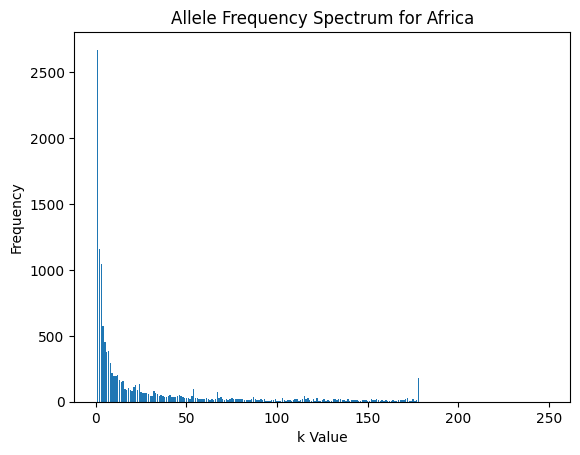

In [10]:
plotAlleleFreqSpect(africa, "Africa")

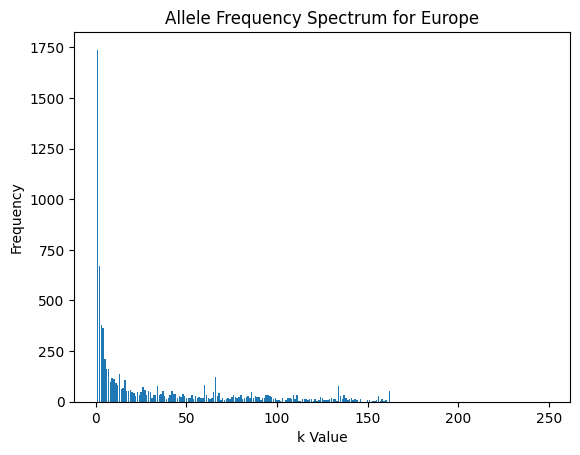

In [11]:
plotAlleleFreqSpect(europe, "Europe")

<span style = "color:red"> <strong> Both plots demonstrate a geometric distribution which has a high frequency for lower k counts and quickly declines to relativley low frequencies for higher k counts. For the African allele frequency spectrum, we observe a higher initial frequency at k = 1 than the European spectrum. We also observe higher possible k values for the African subset as the plot shows some non-zero frequencies near k = 175 while Europe has k frequencies near k = 160. Overall, there appears to be higher frequency counts for Africa compared to Europe which may be explained in part by the higher number of polymorphic sites observed for Africa (as outlined in Question 1). </strong> </span>

Next I want you to compute the bootstrap 95% confidence interval for the average
pairwise diversity statistic. Below are instructions to compute the average pairwise
diversity statistic:
a. Randomly pick two haplotypes. For our small example, say we pick the left
haplotype of NA1 (1,0,1,0) and the right haplotype of NA2 (0,0,1,0). This pair of
haplotypes disagree at the first SNP but agree at the other three SNPs. So 𝜋 =
0.25 (the fraction of SNPs for which the pair disagrees).
b. Repeat step (a) 50 times (randomly selecting two haplotypes each time). Take the
average of these 50 𝜋 values. This is our estimate of the average pairwise
diversity.
To get the bootstrap 95% confidence interval repeat steps (a) and (b) 100 times, then sort
the 100 average pairwise diversity estimates, the estimates at the 2nd and the 98th
positions make the bootstrap 95% confidence interval. Note: You can’t use the “myboot”
function from lecture because that function used a vector as input, while for this problem
you need two-dimensional matrices.


<strong>3. I want you to compute three separate bootstrap 95% confidence intervals for the
average pairwise diversity statistic: one within the European samples, one within
the African samples, and one between the European and African samples. To get
the three confidence intervals, you have to repeat the entire procedure above three
times: to get the confidence intervals within the European samples all the
randomly chosen haplotypes are from Europeans, to get the confidence interval
within the African samples all the randomly haplotypes are from Africans, and to
get the confidence interval between the European and African samples all the
randomly chosen pairs of haplotypes contain one from a European and one from
an African. Due to the out-of-Africa hypothesis, we expect that the average
pairwise diversity within Europe will be less than the other two. Is this what we
observe? </strong>

    
Note: You cannot eliminate all loops for this problem, but do try to eliminate unnecessary
loops (which can really slow your code down)

In [12]:
def calculateAvgPairwiseDiversity(popDataframe, reps: int, mixedSamples: bool):
    sumPiValues = 0
    for replication in range(reps):
        if mixedSamples == False:
            haplotype_pairs = popDataframe.sample(n = 2, axis = 1, replace = True)
        else:
            haplotype_pairs = pd.concat([popDataframe.iloc[:, 9:90].sample(n = 1, axis = 1, replace = True), popDataframe.iloc[:, 90:179].sample(n = 1, axis = 1, replace = True)], axis = 1)
        hapOneCol = np.random.randint(2)
        hapOne = haplotype_pairs.iloc[:,0].apply(lambda row: row.split("|")[hapOneCol].strip()).to_numpy()
        hapTwoCol = np.random.randint(2)
        hapTwo = haplotype_pairs.iloc[:,1].apply(lambda row: row.split("|")[hapTwoCol].strip()).to_numpy()
        numPairwiseMatches = sum(hapOne != hapTwo)
#         numPairwiseMatches = sum(combinedDF.apply(lambda row: row.iloc[0] == row.iloc[1]))
#         for i in range(len(hapOne)):
#             if hapOne.iloc[i] == hapTwo.iloc[i]:
#                 numPairwiseMatches += 1
        repPiValue = float(numPairwiseMatches)/len(hapOne)
        sumPiValues += repPiValue
    averagePiValue = float(sumPiValues)/reps
    return averagePiValue

def bootstrapPairwiseDiversity(popDataframe, numTrials: int, mixedSamples: bool):
    bootstrapValues = []
    for trial in range(numTrials):
        bootstrapValues.append(calculateAvgPairwiseDiversity(popDataframe, 50, mixedSamples))
    bootstrapValues.sort()
    return [bootstrapValues[2], bootstrapValues[98]]

In [16]:
data = pd.read_csv("abbgen1k.csv")
african_subset = data.iloc[:, 9:90]
print("African subset CI: " + str(bootstrapPairwiseDiversity(african_subset, 100, False)))

African subset CI: [0.08789341377576675, 0.09801910507792863]


In [17]:
european_subset = data.iloc[:, 90:179]
print("European subset CI: " + str(bootstrapPairwiseDiversity(european_subset, 100, False)))

European subset CI: [0.10881850175967824, 0.11718451483157366]


In [18]:
afroeuropean_subset = data
print("Afro-European subset CI: " + str(bootstrapPairwiseDiversity(afroeuropean_subset, 100, True)))

Afro-European subset CI: [0.11542483660130715, 0.1212192056309703]


<span style = "color:red" > <strong> In concordance with the out-of-Africa hypothesis, we do observe a lower average pairwise diversity within Europe compared to the Africa and Europe-Africa population compositions based on our bootstrapping results. </strong> </span>